In [140]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [141]:
img=cv2.imread('/content/sharapova1.jpg')
img.shape

(555, 700, 3)

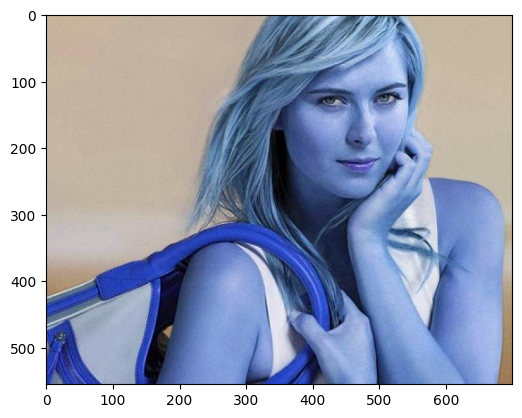

In [142]:
plt.imshow(img)

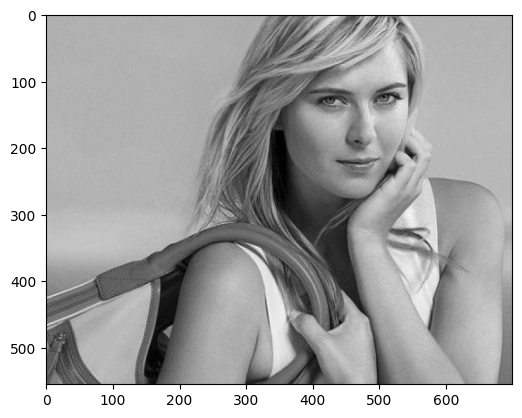

In [143]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
#

In [144]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces
#

array([[352,  38, 233, 233]], dtype=int32)

In [145]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

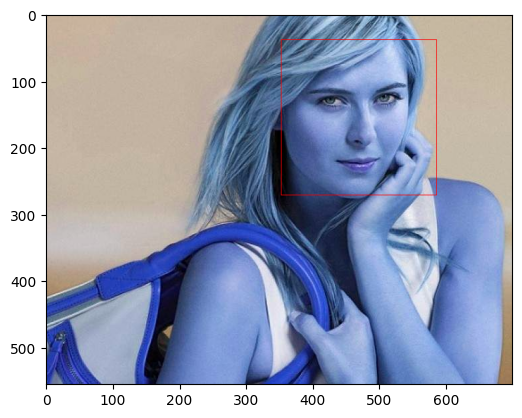

In [146]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
plt.imshow(face_img)

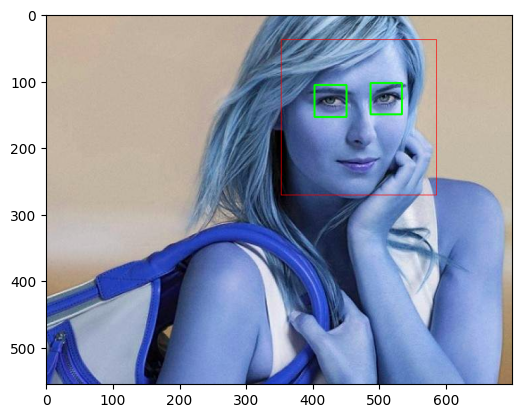

In [147]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eyes=eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

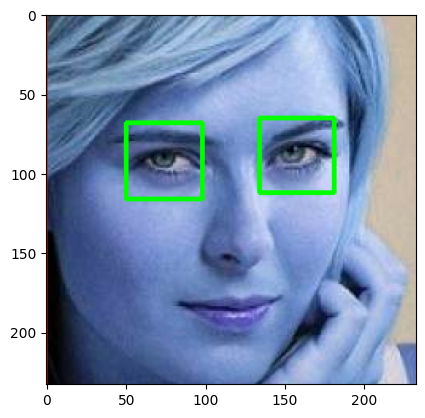

In [148]:
plt.imshow(roi_color,cmap='gray')

In [149]:
def get_cropped_image_if_2_eyes(image_path):
  img=cv2.imread(image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    if len(eyes)>=2:
      return roi_color

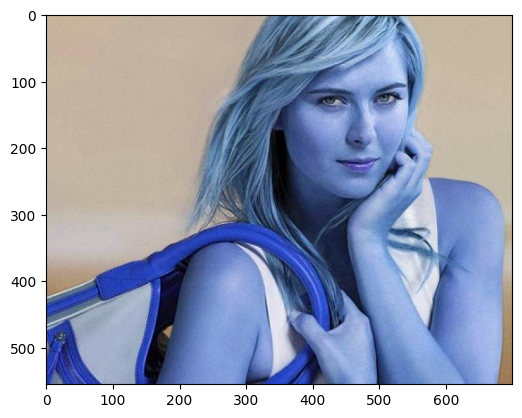

In [150]:
orginal_image=cv2.imread('/content/sharapova1.jpg')
plt.imshow(orginal_image)

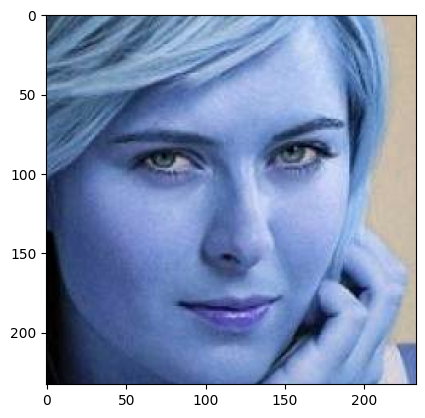

In [151]:
cropped_image=get_cropped_image_if_2_eyes('/content/sharapova1.jpg')
plt.imshow(cropped_image)
#

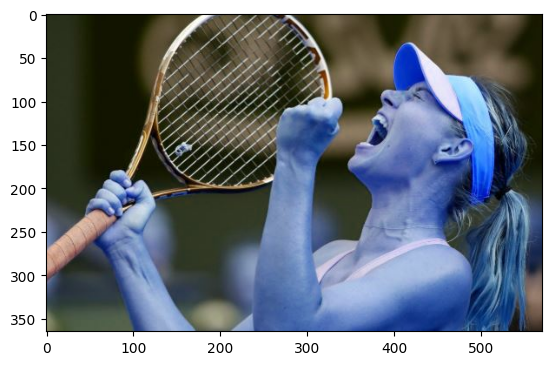

In [152]:
org_img_obstructed=cv2.imread('/content/sharapova2.JPG')
plt.imshow(org_img_obstructed)

In [153]:
cropped_image_no_obstruction=get_cropped_image_if_2_eyes('/content/sharapova2.JPG')
cropped_image_no_obstruction
#

In [154]:
from zipfile import ZipFile
file_path = '/content/dataset.zip'
file_name = file_path

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [155]:
path_to_data='/content/dataset'
path_to_cr_data='/content/dataset/cropped'

In [156]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [157]:
img_dirs

['/content/dataset/maria_sharapova',
 '/content/dataset/serena_williams',
 '/content/dataset/lionel_messi',
 '/content/dataset/virat_kohli',
 '/content/dataset/cropped',
 '/content/dataset/roger_federer']

In [158]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [159]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
  count=1
  celebrity_name=img_dir.split('/')[-1]
  print(celebrity_name)
  celebrity_file_names_dict[celebrity_name]=[]

  for entry in os.scandir(img_dir):
    roi_color=get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder=path_to_cr_data+'/'+celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print('cropped_folder created',cropped_folder)
      cropped_file_name='cropped'+str(count)+'.png'
      cropped_file_path=cropped_folder+'/'+cropped_file_name
      cv2.imwrite(cropped_file_path,roi_color)

      celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
      count+=1


maria_sharapova
cropped_folder created /content/dataset/cropped/maria_sharapova
serena_williams
cropped_folder created /content/dataset/cropped/serena_williams
lionel_messi
cropped_folder created /content/dataset/cropped/lionel_messi
virat_kohli
cropped_folder created /content/dataset/cropped/virat_kohli
cropped


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
